In [16]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec


In [17]:
df = pd.read_csv("./articles.csv")

#convert to list 
docs = df.text.tolist()
docs

["Oh, how the headlines blared:\nChatbots were The Next Big Thing.\nOur hopes were sky high. Bright-eyed and bushy-tailed, the industry was ripe for a new era of innovation: it was time to start socializing with machines.\nAnd why wouldn’t they be? All the road signs pointed towards insane success.\nAt the Mobile World Congress 2017, chatbots were the main headliners. The conference organizers cited an ‘overwhelming acceptance at the event of the inevitable shift of focus for brands and corporates to chatbots’.\nIn fact, the only significant question around chatbots was who would monopolize the field, not whether chatbots would take off in the first place:\nOne year on, we have an answer to that question.\nNo.\nBecause there isn’t even an ecosystem for a platform to dominate.\nChatbots weren’t the first technological development to be talked up in grandiose terms and then slump spectacularly.\nThe age-old hype cycle unfolded in familiar fashion...\nExpectations built, built, and then..

In [18]:
len(docs)

337

In [21]:
model = Top2Vec(documents=docs, speed="learn", workers=8, embedding_model='universal-sentence-encoder')

2023-01-10 17:53:28,292 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-01-10 17:53:29,578 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-01-10 17:53:32,886 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-01-10 17:53:34,924 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-01-10 17:53:36,742 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-01-10 17:53:36,753 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [22]:
model.get_num_topics()


4

In [23]:
model.topic_words

array([['tensorflow', 'keras', 'lstm', 'backpropagation', 'scikit',
        'neural', 'clustering', 'alphago', 'classifier', 'convolutional',
        'deepmind', 'convolution', 'algorithms', 'neuron', 'dataset',
        'numpy', 'nlp', 'neurons', 'computational', 'datasets',
        'sigmoid', 'cuda', 'algorithm', 'regression', 'openai',
        'chatbot', 'segmentation', 'predictive', 'gradients', 'ai',
        'computation', 'clusters', 'matrix', 'cnns', 'graph', 'gradient',
        'chatbots', 'cluster', 'python', 'udemy', 'gpu', 'simulations',
        'bounding', 'blockchain', 'cognitive', 'compute', 'coursera',
        'binary', 'learns', 'cnn'],
       ['alphago', 'chatbot', 'deepmind', 'chatbots', 'ai', 'openai',
        'algorithms', 'turing', 'computational', 'neural',
        'technologies', 'automated', 'nlp', 'lstm', 'backpropagation',
        'tensorflow', 'automation', 'neuron', 'sophisticated',
        'advanced', 'learns', 'keras', 'udemy', 'startups', 'smarter',
      

In [24]:
model.topic_words[1]


array(['alphago', 'chatbot', 'deepmind', 'chatbots', 'ai', 'openai',
       'algorithms', 'turing', 'computational', 'neural', 'technologies',
       'automated', 'nlp', 'lstm', 'backpropagation', 'tensorflow',
       'automation', 'neuron', 'sophisticated', 'advanced', 'learns',
       'keras', 'udemy', 'startups', 'smarter', 'coursera', 'developed',
       'mit', 'algorithm', 'predictive', 'matrix', 'intelligent', 'bots',
       'ibm', 'blockchain', 'technology', 'artificial', 'compute',
       'scikit', 'neurons', 'cognitive', 'udacity', 'simulated', 'ml',
       'computing', 'computation', 'clustering', 'gradients', 'interact',
       'analytics'], dtype='<U15')

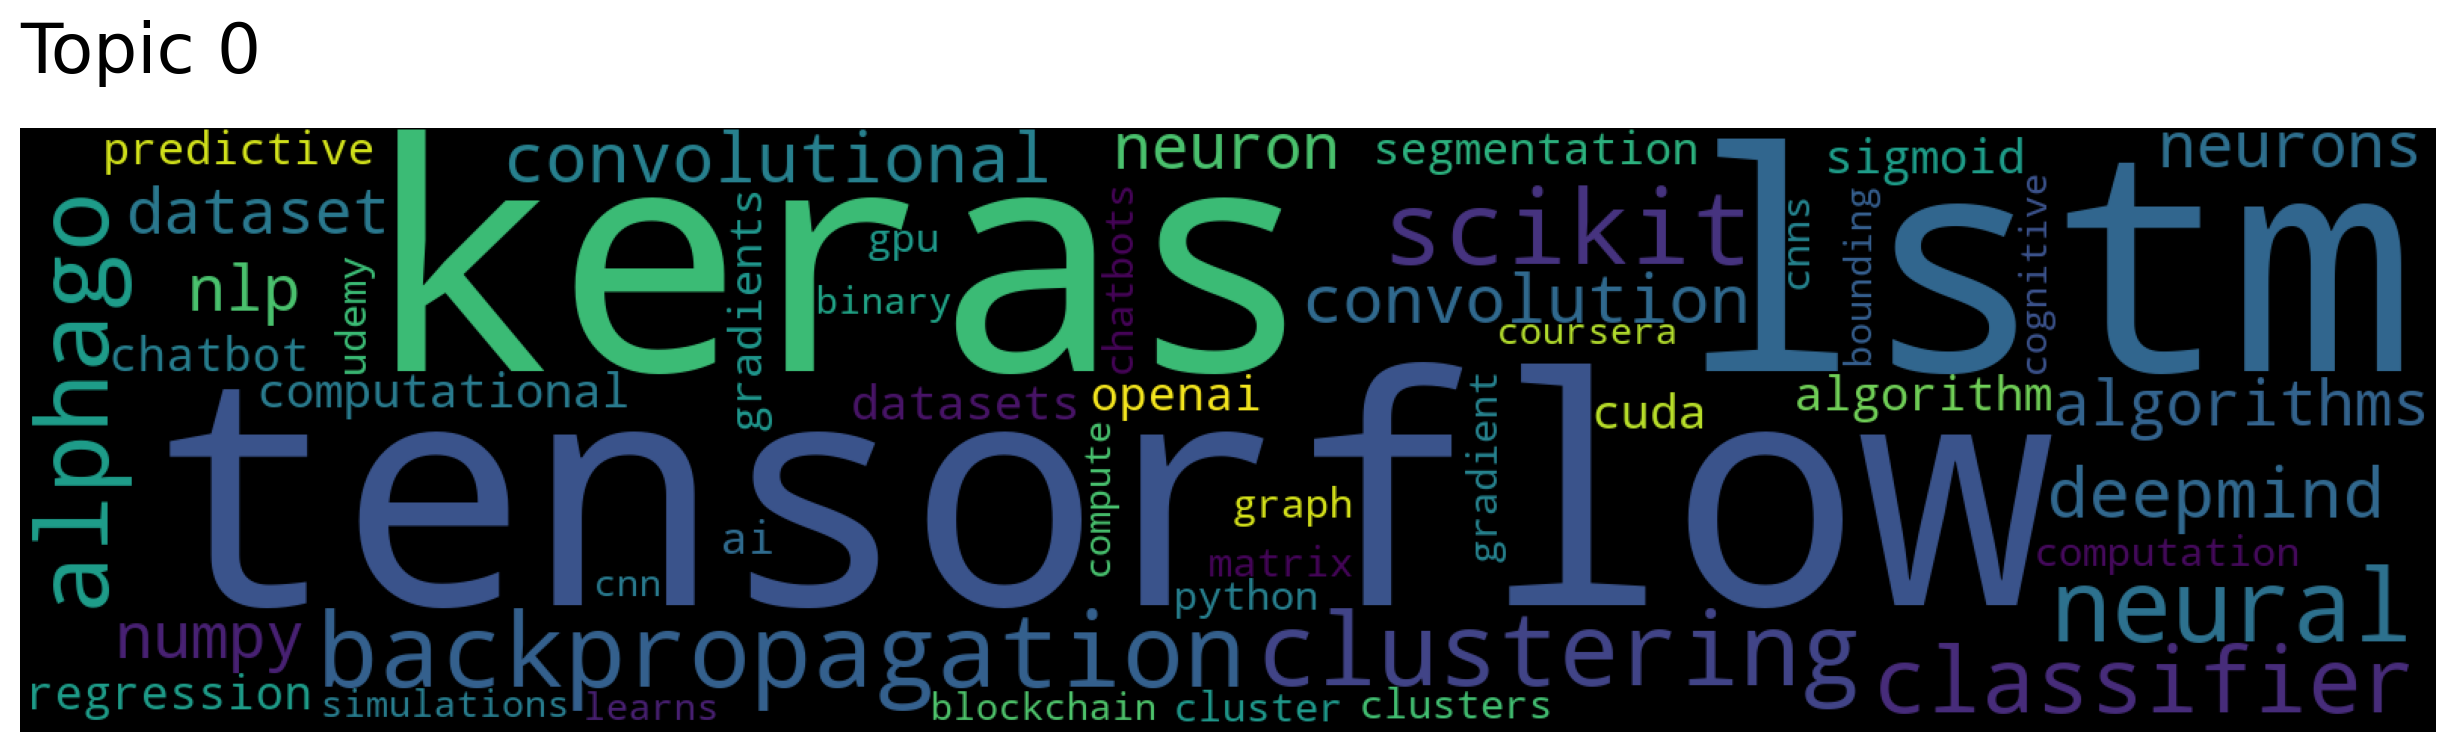

In [25]:
model.generate_topic_wordcloud(0)


In [26]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["machine"], num_topics=2)
topic_words, topic_scores


([array(['alphago', 'deepmind', 'chatbot', 'lstm', 'neural', 'nlp',
         'computational', 'algorithms', 'chatbots', 'keras', 'ai',
         'classifier', 'algorithm', 'backpropagation', 'dataset', 'turing',
         'convolution', 'openai', 'tensorflow', 'datasets', 'language',
         'scikit', 'learns', 'neuron', 'clustering', 'computing',
         'convolutional', 'mit', 'predictive', 'computation', 'languages',
         'google', 'data', 'advanced', 'automated', 'compute', 'sentences',
         'neurons', 'udacity', 'semantic', 'coursera', 'regression',
         'translation', 'ml', 'ibm', 'capable', 'reinforcement', 'udemy',
         'efficiently', 'processing'], dtype='<U15'),
  array(['alphago', 'chatbot', 'deepmind', 'chatbots', 'ai', 'openai',
         'algorithms', 'turing', 'computational', 'neural', 'technologies',
         'automated', 'nlp', 'lstm', 'backpropagation', 'tensorflow',
         'automation', 'neuron', 'sophisticated', 'advanced', 'learns',
         'kera

In [27]:
model.search_documents_by_topic(0, num_docs=20)


(array(['In my last blog post, thanks to an excellent blog post by Andrew Trask, I learned how to build a neural network for the first time. It was super simple. 9 lines of Python code modelling the behaviour of a single neuron.\nBut what if we are faced with a more difficult problem? Can you guess what the ‘?’ should be?\nThe trick is to notice that the third column is irrelevant, but the first two columns exhibit the behaviour of a XOR gate. If either the first column or the second column is 1, then the output is 1. However, if both columns are 0 or both columns are 1, then the output is 0.\nSo the correct answer is 0.\nHowever, this would be too much for our single neuron to handle. This is considered a “nonlinear pattern” because there is no direct one-to-one relationship between the inputs and the output.\nInstead, we must create an additional hidden layer, consisting of four neurons (Layer 1). This layer enables the neural network to think about combinations of inputs.\nYou can s

In [28]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=2)


In [29]:
topic_mapping[0]


[3, 2, 0]

In [30]:
model.topic_words_reduced[0]


array(['tensorflow', 'keras', 'lstm', 'backpropagation', 'scikit',
       'clustering', 'alphago', 'neural', 'deepmind', 'algorithms',
       'classifier', 'convolutional', 'convolution', 'computational',
       'numpy', 'dataset', 'nlp', 'neuron', 'datasets', 'algorithm',
       'cuda', 'sigmoid', 'neurons', 'openai', 'chatbot', 'ai',
       'regression', 'segmentation', 'predictive', 'computation',
       'gradients', 'chatbots', 'udemy', 'gpu', 'simulations', 'matrix',
       'graph', 'python', 'gradient', 'compute', 'clusters', 'cnns',
       'coursera', 'cluster', 'learns', 'blockchain', 'bounding', 'gpus',
       'distributed', 'reinforcement'], dtype='<U15')

In [31]:
print(topic_mapping)

[[3, 2, 0], [1]]
